# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.set_option('display.max_colwidth', None)



## 3.4 Functions<a id='3.4_Load_The_Data'></a>

## 3.4 Load Data<a id='3.4_Load_The_Data'></a>

In [20]:
df_adult = pd.read_csv(os.path.join('..', 'raw_data', 'adult.csv'))
df_adult.head(12)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
pd.options.display.max_info_columns = 999
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [21]:
bins = [17, 19, 29, 39, 49, 59, 69, 79, 89, 99]
df_adult['age_bins'] = pd.cut(df_adult['age'], 
                              bins=bins, 
                              labels=['17-19', '20-29', '30-39',
                                      '40-49', '50-59', '60-69',
                                      '70-79', '80-89', '90-99'])
df_adult.head(11)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_bins
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,20-29
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,30-39
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,20-29
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,40-49
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,17-19
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,30-39
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K,20-29
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,60-69
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,20-29
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,50-59


In [6]:
df_age_education_income = df_adult.groupby(['age_bins', 'education'])['income']\
                                                .value_counts()\
                                                .unstack()\
                                                .reset_index()

In [7]:
df_age_education_income.loc[:, '>50K'] = df_age_education_income.loc[:, '>50K'].fillna(0)

In [8]:
df_age_education_income.loc[:, 'total'] = df_age_education_income.loc[:, '<=50K'] + \
                                          df_age_education_income.loc[:, '>50K']

In [9]:
df_age_education_income.loc[:, '>50K_rate'] = df_age_education_income.loc[:, '>50K'] \
                                              / df_age_education_income.loc[:, 'total']

In [10]:
df_age_education_income.loc[:, '<=50K_rate'] =  df_age_education_income.loc[:, '<=50K'] \
                                              / df_age_education_income.loc[:, 'total']

In [11]:
df_education_educational_num = df_adult.loc[:, ['education', 'educational-num']]\
                                       .drop_duplicates()\
                                       .sort_values('educational-num')

In [12]:
df_age_education_income = pd.merge(df_age_education_income, df_education_educational_num, on='education')

In [16]:
df_age_education_income = df_age_education_income.sort_values(['age_bins', 'educational-num'])
df_age_education_income.head(20)

,age_bins,education,<=50K,>50K,total,>50K_rate,<=50K_rate,educational-num
105,17-19,Preschool,3.0,0.0,3.0,0.000000,1.000000,1
26,17-19,1st-4th,3.0,0.0,3.0,0.000000,1.000000,2
35,17-19,5th-6th,8.0,0.0,8.0,0.000000,1.000000,3
43,17-19,7th-8th,18.0,1.0,19.0,0.052632,0.947368,4
52,17-19,9th,24.0,0.0,24.0,0.000000,1.000000,5
0,17-19,10th,77.0,0.0,77.0,0.000000,1.000000,6
9,17-19,11th,324.0,0.0,324.0,0.000000,1.000000,7
18,17-19,12th,127.0,1.0,128.0,0.007812,0.992188,8
87,17-19,HS-grad,638.0,0.0,638.0,0.000000,1.000000,9
112,17-19,Some-college,680.0,1.0,681.0,0.001468,0.998532,10


/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='age_bins', ylabel='>50K_rate'>

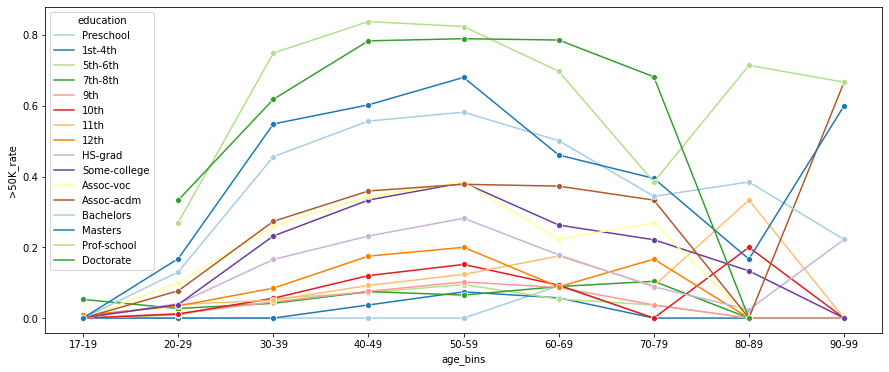

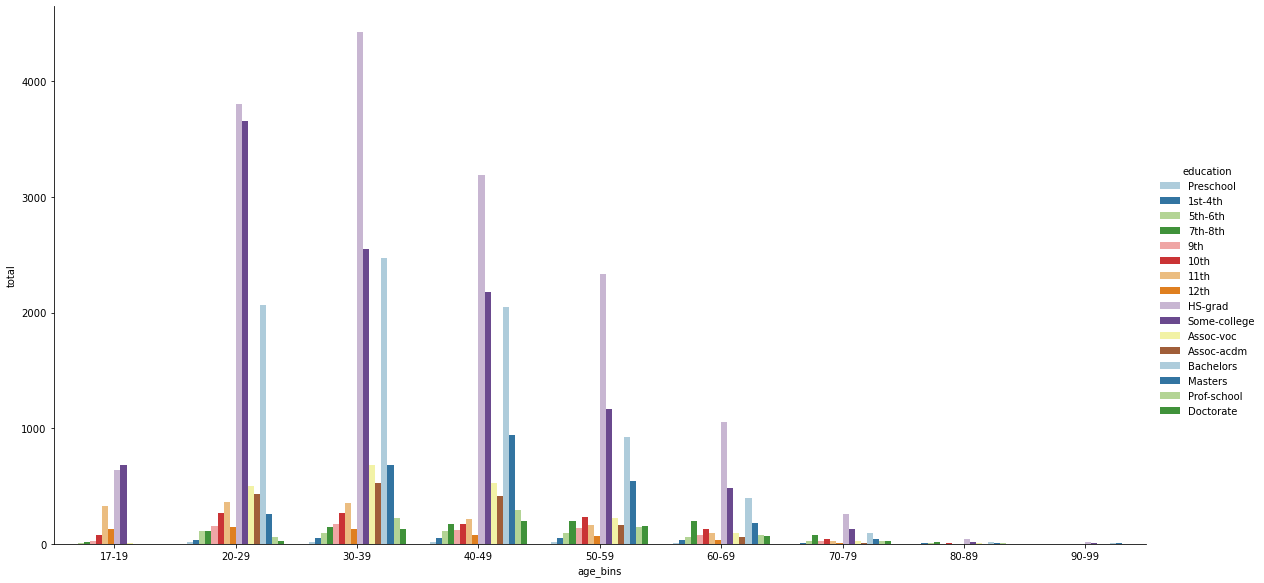

In [32]:
fig, ax = plt.subplots(figsize=(15,6))

sns.catplot(x='age_bins',
            y='total',
            hue='education',
            data=df_age_education_income,
            kind='bar',
            palette="Paired",
            height=8,
            aspect=2,
            ax=ax,
            legend=True)

sns.lineplot(x='age_bins',  
             y='>50K_rate', 
             hue='education', 
             data=df_age_education_income, 
             ax=ax,
             marker='o', 
             legend=True,
             palette='Paired')

